In [1]:
%matplotlib inline

In [2]:
import numpy
import pandas
import sklearn
import itertools
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR

In [3]:
input_directory = '/Users/minhdoan/Toronto RBC/all_scripts/downstream_DL/BFDF_1xMin_ResNet50_fast_6bags_88/count_and_predict/'

In [4]:
os.chdir(input_directory)

In [5]:
filenames =  glob.glob( '*.npy' ) # these files are outputs from STEP3_Evaluate_Classify_Count.ipynb 

In [6]:
all_cm = [ numpy.load(iii) for iii in filenames]

In [7]:
output_directory = '/Users/minhdoan/Toronto RBC/all_scripts/downstream_DL/BFDF_1xMin_ResNet50_fast_6bags_88/regression'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Regression

In [8]:
collecting_days_1 = [2,5,9,14,16,23,26,28,29,36,42]

In [9]:
filehandler = 'abs_count_per_bag.sav' # this file is an output from STEP3_Evaluate_Classify_Count.ipynb 
abs_count_per_bag = pickle.load( open(filehandler, 'rb') )

normalized_abs_count_per_bag = []
for bag in abs_count_per_bag:
    
    normalized_abs_count = []
    for i in bag:
        normalized_abs_count.append([j/sum(i) for j in i])

    normalized_abs_count_per_bag.append(normalized_abs_count)    

In [10]:
x = [day for bag in normalized_abs_count_per_bag for day in bag]

In [11]:
age = collecting_days_1 * (4 * 3) # bags x number of replicates per bag

In [12]:
X = numpy.array(x[:132])
y = numpy.array(age[:132])

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

Repeat loading for Deep learning

In [13]:
filehandler = 'dl_count_per_bag.sav' # this file is an output from STEP3_Evaluate_Classify_Count.ipynb 
dl_count_per_bag = pickle.load( open(filehandler, 'rb') )
dl_count_per_bag[5][3].insert(0,0) # a missed count when there was no Smooth Disc

normalized_dl_count_per_bag = []
for bag in dl_count_per_bag:
    
    normalized_dl_count = []
    for i in bag:
        normalized_dl_count.append([j/sum(i) for j in i])

    normalized_dl_count_per_bag.append(normalized_dl_count) 

In [14]:
x_dl = [day for bag in normalized_dl_count_per_bag for day in bag]

In [15]:
X_dl = numpy.array(x_dl[:132])

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf_dl = svr_rbf.fit(X, y).predict(X_dl)
y_lin_dl = svr_lin.fit(X, y).predict(X_dl)
y_poly_dl = svr_poly.fit(X, y).predict(X_dl)

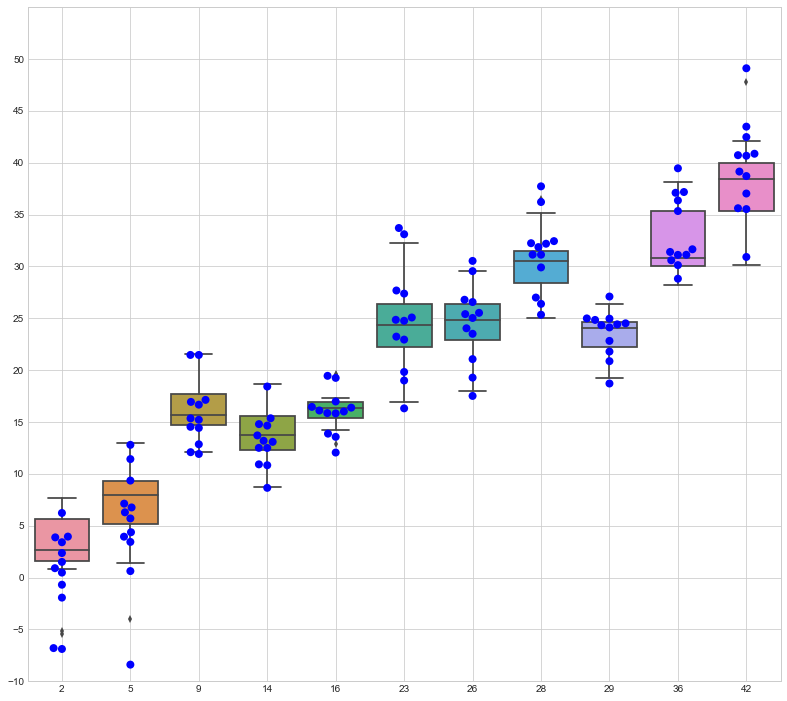

In [16]:
# plot
seaborn.set_style('whitegrid')
fig, ax = plt.subplots()
fig.tight_layout()

# the size of A4 paper
fig.set_size_inches(11.7, 11.7)

# Font size
seaborn.set(font_scale = 2.5)


# Axes limit
axes = ax.axes
axes.set_xlim(-10,60)
axes.set_ylim(-10,55)

# Number of ticks in axes
plt.yticks(numpy.arange(-10, 55, 5))
plt.xticks(numpy.arange(-10, 60, 5))

# specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks( rotation=25)

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

age_2 = age[:132]
y_2 = numpy.array(age_2)


ax = seaborn.boxplot(x=y, y=y_rbf)
ax = seaborn.swarmplot(x=y_2, y=y_rbf_dl, color="blue",s=8, edgecolor="blue")
ax.grid(True)

plt.savefig('Scoring.png', dpi = 300, bbox_inches='tight')

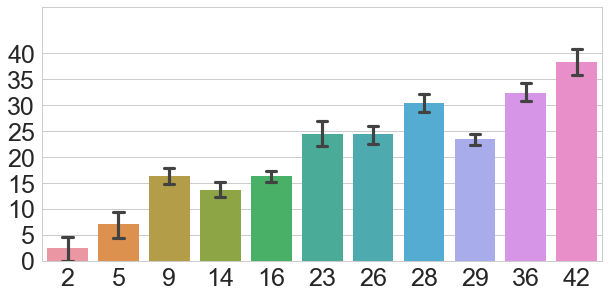

In [17]:
# plot
seaborn.set_style('whitegrid')
fig, ax = plt.subplots()
fig.tight_layout()

# the size of A4 paper
fig.set_size_inches(11.7, 5)

# Font size
seaborn.set(font_scale = 2.5)

# Number of ticks in axes
plt.yticks(numpy.arange(-10, 45, 5))

# Axes limit
# axes = ax.axes
axes.set_ylim(-10,55)

# specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks( rotation=45)

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

seaborn.barplot(x=y, y=y_rbf, capsize=.2, ax=ax)
plt.savefig('marginal_abs.png', dpi = 300, bbox_inches='tight')
plt.show()

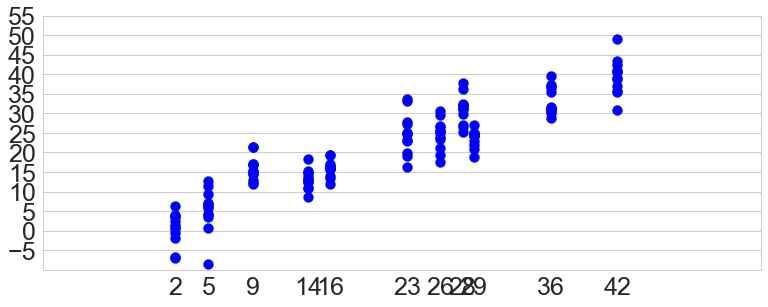

In [18]:
# plot
seaborn.set_style('whitegrid')
fig, ax = plt.subplots()
fig.tight_layout()

# the size of A4 paper
fig.set_size_inches(15, 5)

# Font size
seaborn.set(font_scale = 2)

# Number of ticks in axes
plt.yticks(numpy.arange(-5, 61, 5))

# Axes limit
# axes = ax.axes
axes.set_ylim(-5,61)

# specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks( rotation=45)

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

y_pos = [2,5,9,14,16,23,26,28,29,36,42]

names = ['2','5','9','14','16','23','26','28','29','36','42']

# seaborn.barplot(x=y_2, y=y_lin_dl, capsize=.2, ax=ax, color = "blue")
plt.grid(axis='x')
# plt.bar(y_2, y_rbf_dl, color = "blue")
plt.scatter(y_2, y_rbf_dl, color = "blue", s= 100)
plt.xticks(y_2, names)
plt.xlim(-10,55)
plt.ylim(-10,55)
#axes.set_xlim(-10,55)

# Number of ticks in axes
#plt.xticks(numpy.arange(-10, 55, 5))

plt_name = 'marginal_dl.png'
# plt.savefig(os.path.join(output_directory, plt_name), dpi = 300, bbox_inches='tight')

plt.show()